# Assignment 2

In this assigment, we will work with the *Forest Fire* data set. Please download the data from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/162/forest+fires). Extract the data files into the subdirectory: `../data/fires/` (relative to `./05_src/`).

## Objective

+ The model objective is to predict the area affected by forest fires given the features set. 
+ The objective of this exercise is to assess your ability to construct and evaluate model pipelines.
+ Please note: the instructions are not meant to be 100% prescriptive, but instead they are a set of minimum requirements. If you find predictive performance gains by applying additional steps, by all means show them. 

## Variable Description

From the description file contained in the archive (`forestfires.names`), we obtain the following variable descriptions:

1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
3. month - month of the year: "jan" to "dec" 
4. day - day of the week: "mon" to "sun"
5. FFMC - FFMC index from the FWI system: 18.7 to 96.20
6. DMC - DMC index from the FWI system: 1.1 to 291.3 
7. DC - DC index from the FWI system: 7.9 to 860.6 
8. ISI - ISI index from the FWI system: 0.0 to 56.10
9. temp - temperature in Celsius degrees: 2.2 to 33.30
10. RH - relative humidity in %: 15.0 to 100
11. wind - wind speed in km/h: 0.40 to 9.40 
12. rain - outside rain in mm/m2 : 0.0 to 6.4 
13. area - the burned area of the forest (in ha): 0.00 to 1090.84 









### Specific Tasks

+ Construct four model pipelines, out of combinations of the following components:

    + Preprocessors:

        - A simple processor that only scales numeric variables and recodes categorical variables.
        - A transformation preprocessor that scales numeric variables and applies a non-linear transformation.
    
    + Regressor:

        - A baseline regressor, which could be a [K-nearest neighbours model]() or a linear model like [Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) or [Ridge Regressors](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ridge_regression.html).
        - An advanced regressor of your choice (e.g., Bagging, Boosting, SVR, etc.). TIP: select a tree-based method such that it does not take too long to run SHAP further below. 

+ Evaluate tune and evaluate each of the four model pipelines. 

    - Select a [performance metric](https://scikit-learn.org/stable/modules/linear_model.html) out of the following options: explained variance, max error, root mean squared error (RMSE), mean absolute error (MAE), r-squared.
    - *TIPS*: 
    
        * Out of the suggested metrics above, [some are correlation metrics, but this is a prediction problem](https://www.tmwr.org/performance#performance). Choose wisely (and don't choose the incorrect options.) 

+ Select the best-performing model and explain its predictions.

    - Provide local explanations.
    - Obtain global explanations and recommend a variable selection strategy.

+ Export your model as a pickle file.


You can work on the Jupyter notebook, as this experiment is fairly short (no need to use sacred). 

# Load the data

Place the files in the ../../05_src/data/fires/ directory and load the appropriate file. 

In [125]:
%load_ext dotenv
%dotenv 

The dotenv extension is already loaded. To reload it, use:
  %reload_ext dotenv


In [126]:
# Load the libraries as required.
import pandas as pd
from pathlib import Path
import os
notebook_dir = Path.cwd()
src_path = (notebook_dir / "../../01_materials/labs").resolve()
update_path = os.path.join(src_path, 'update_path.py')
%run $update_path

In [127]:
# Load data
columns = [
    'coord_x', 'coord_y', 'month', 'day', 'ffmc', 'dmc', 'dc', 'isi', 'temp', 'rh', 'wind', 'rain', 'area' 
]
fires_dt = (pd.read_csv('../../05_src/data/fires/forestfires.csv', header = 0, names = columns))
fires_dt.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   coord_x  517 non-null    int64  
 1   coord_y  517 non-null    int64  
 2   month    517 non-null    object 
 3   day      517 non-null    object 
 4   ffmc     517 non-null    float64
 5   dmc      517 non-null    float64
 6   dc       517 non-null    float64
 7   isi      517 non-null    float64
 8   temp     517 non-null    float64
 9   rh       517 non-null    int64  
 10  wind     517 non-null    float64
 11  rain     517 non-null    float64
 12  area     517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


# Get X and Y

Create the features data frame and target data.

In [128]:
X = fires_dt.drop(columns=['area'])
X

,coord_x,coord_y,month,day,ffmc,dmc,dc,isi,temp,rh,wind,rain
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0


In [129]:
Y = fires_dt['area']
Y

0       0.00
1       0.00
2       0.00
3       0.00
4       0.00
       ...  
512     6.44
513    54.29
514    11.16
515     0.00
516     0.00
Name: area, Length: 517, dtype: float64

In [130]:
# The describe method shows that all features have the mean and median close. 
# Except for the area whose median = 0.52 and mean = 12.84
fires_dt.describe()

,coord_x,coord_y,ffmc,dmc,dc,isi,temp,rh,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [131]:
# The area label equal 0 in 247 entries which is 247/517 = 47.78% of the entries. 
# This will make it hard for a model to learn from the data.
fires_dt['area'].value_counts()

area
0.00     247
1.94       3
0.43       2
1.46       2
1.95       2
        ... 
5.80       1
2.17       1
6.44       1
54.29      1
11.16      1
Name: count, Length: 251, dtype: int64

# Preprocessing

Create two [Column Transformers](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html), called preproc1 and preproc2, with the following guidelines:

- Numerical variables

    * (Preproc 1 and 2) Scaling: use a scaling method of your choice (Standard, Robust, Min-Max). 
    * Preproc 2 only: 
        
        + Choose a transformation for any of your input variables (or several of them). Evaluate if this transformation is convenient.
        + The choice of scaler is up to you.

- Categorical variables: 
    
    * (Preproc 1 and 2) Apply [one-hot encoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) where appropriate.


+ The only difference between preproc1 and preproc2 is the non-linear transformation of the numerical variables.
    


### Preproc 1

Create preproc1 below.

+ Numeric: scaled variables, no other transforms.
+ Categorical: one-hot encoding.

In [132]:
X.columns.values

array(['coord_x', 'coord_y', 'month', 'day', 'ffmc', 'dmc', 'dc', 'isi',
       'temp', 'rh', 'wind', 'rain'], dtype=object)

In [133]:
num_columns = [
    'coord_x', 'coord_y', 'ffmc', 'dmc', 'dc', 'isi', 'temp', 'rh', 'wind', 'rain' 
]
cat_columns = [
    'month', 'day'
]

In [134]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, PowerTransformer, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

In [135]:
preproc1 = ColumnTransformer(
    transformers=[
        ('num_transform', StandardScaler(), num_columns ),
        ('cat_transform', OneHotEncoder(handle_unknown='infrequent_if_exist', drop='first'), cat_columns),
    ], remainder='passthrough'
)
preproc1

,transformers,"[('num_transform', ...), ('cat_transform', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,copy,True
,with_mean,True
,with_std,True


### Preproc 2

Create preproc1 below.

+ Numeric: scaled variables, non-linear transformation to one or more variables.
+ Categorical: one-hot encoding.

In [136]:
num_columns = [
    'coord_x', 'coord_y', 'ffmc', 'dmc', 'dc', 'isi'
]
num_cols_transform = [
    'temp', 'rh', 'wind', 'rain' 
]

In [137]:
pipe_num_yj = Pipeline([
    ('standardizer', StandardScaler()),
    ('transform', PowerTransformer(method='yeo-johnson'))
])

preproc2 = ColumnTransformer(
    transformers=[
        ('num_transform', StandardScaler(), num_columns ),
        ('non_lin_transform', pipe_num_yj, num_cols_transform ),
        ('cat_transform', OneHotEncoder(handle_unknown='infrequent_if_exist', drop='first'), cat_columns),
    ], remainder='passthrough'
)
preproc2

,transformers,"[('num_transform', ...), ('non_lin_transform', ...), ...]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,copy,True
,with_mean,True
,with_std,True


## Model Pipeline


Create a [model pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html): 

+ Add a step labelled `preprocessing` and assign the Column Transformer from the previous section.
+ Add a step labelled `regressor` and assign a regression model to it. 

## Regressor

+ Use a regression model to perform a prediction. 

    - Choose a baseline regressor, tune it (if necessary) using grid search, and evaluate it using cross-validation.
    - Choose a more advance regressor, tune it (if necessary) using grid search, and evaluate it using cross-validation.
    - Both model choices are up to you, feel free to experiment.

In [138]:
scoring = [
    'neg_root_mean_squared_error',
    'explained_variance',
    'max_error',
    'neg_mean_absolute_error',
    'r2'
]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [139]:
# Pipeline A = preproc1 + baseline
pipeline_knr = Pipeline([
    ('preprocess', preproc1),
    ('model', KNeighborsRegressor(n_neighbors=5))
])
pipeline_knr

,steps,"[('preprocess', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num_transform', ...), ('cat_transform', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [140]:
res_simple_dict = cross_validate(pipeline_knr, X_train, Y_train, cv = 5, scoring = scoring)
res_simple = pd.DataFrame(res_simple_dict)
res_simple


c:\Users\ataka\dsi\production\cohort_8_ver2\production\production-env\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\ataka\dsi\production\cohort_8_ver2\production\production-env\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


,fit_time,score_time,test_neg_root_mean_squared_error,test_explained_variance,test_max_error,test_neg_mean_absolute_error,test_r2
0,0.054064,0.077177,-44.562546,-0.216615,-277.506,-17.780843,-0.217315
1,0.029787,0.093490,-35.606803,-4.551641,-187.950,-16.527060,-4.860652
2,0.030931,0.065590,-34.239906,-0.622528,-190.270,-16.382145,-0.627555
3,0.029700,0.056112,-87.650713,-0.055285,-746.100,-23.777098,-0.066325
4,0.026257,0.055858,-25.425894,-0.077772,-180.366,-11.694902,-0.101124


In [141]:
# Pipeline B = preproc1 + baseline
pipeline_lasso = Pipeline([
    ('preprocess', preproc1),
    ('model', Lasso(alpha=0.1))
])
pipeline_lasso

,steps,"[('preprocess', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num_transform', ...), ('cat_transform', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [142]:
res_simple_dict = cross_validate(pipeline_lasso, X_train, Y_train, cv = 5, scoring = scoring)
res_simple = pd.DataFrame(res_simple_dict)
res_simple


c:\Users\ataka\dsi\production\cohort_8_ver2\production\production-env\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\ataka\dsi\production\cohort_8_ver2\production\production-env\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


,fit_time,score_time,test_neg_root_mean_squared_error,test_explained_variance,test_max_error,test_neg_mean_absolute_error,test_r2
0,0.041888,0.042678,-40.776596,-0.018357,-268.690295,-17.547923,-0.019260
1,0.046348,0.035009,-18.833710,-0.499025,-55.580777,-14.727872,-0.639652
2,0.037010,0.025429,-33.196434,-0.523833,-162.848150,-18.003412,-0.529866
3,0.028297,0.030984,-85.214687,0.000827,-731.042870,-23.876190,-0.007878
4,0.030061,0.023890,-26.080281,-0.106906,-180.551792,-15.162537,-0.158533


In [143]:
# Pipeline C = preproc1 + advanced model
pipeline_bagging = Pipeline([
    ('preprocess', preproc2),
    ('model', BaggingRegressor(
    n_estimators=100,
    random_state=42) )
])
pipeline_bagging

,steps,"[('preprocess', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num_transform', ...), ('non_lin_transform', ...), ...]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [144]:
res_simple_dict = cross_validate(pipeline_bagging, X_train, Y_train, cv = 5, scoring = scoring)
res_simple = pd.DataFrame(res_simple_dict)
res_simple

c:\Users\ataka\dsi\production\cohort_8_ver2\production\production-env\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\ataka\dsi\production\cohort_8_ver2\production\production-env\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


,fit_time,score_time,test_neg_root_mean_squared_error,test_explained_variance,test_max_error,test_neg_mean_absolute_error,test_r2
0,1.960258,0.099144,-56.257739,-0.932036,-318.5913,-21.704861,-0.940115
1,1.902591,0.097799,-40.899649,-5.728188,-171.9228,-22.182101,-6.732487
2,1.836276,0.096156,-29.356661,-0.188262,-113.9918,-17.324573,-0.196420
3,1.728115,0.086816,-86.744918,-0.042552,-736.3487,-26.847460,-0.044400
4,2.052560,0.093029,-28.550422,-0.358237,-193.6367,-13.664057,-0.388381


In [145]:
# Pipeline D = preproc2 + advanced model
pipeline_rf = Pipeline([
    ('preprocess', preproc2),
    ('model', RandomForestRegressor(
    n_estimators=100,
    random_state=42) )
])
pipeline_rf
    

,steps,"[('preprocess', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num_transform', ...), ('non_lin_transform', ...), ...]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


# Tune Hyperparams

+ Perform GridSearch on each of the four pipelines. 
+ Tune at least one hyperparameter per pipeline.
+ Experiment with at least four value combinations per pipeline.

In [146]:
# Add dataframe to store the best estimators
column_names = ['Model', 'Score', 'Estimator']
df_best_estimators = pd.DataFrame(columns=column_names)

# This method will be called for to store the best models, in total it will contain 4 rows.
def add_estimator(model, score, estimator):
    #new_row_data = [model, score, estimator]
    new_row_data = {"Model": model, "Score": score, "Estimator": estimator}
    # Add the new row using .loc[]
    df_best_estimators.loc[len(df_best_estimators)] = new_row_data

In [147]:
pipeline_knr.get_params()
scoring = [
    'explained_variance',
    'neg_root_mean_squared_error',
    'neg_mean_absolute_error',
    'r2'
]

param_grid = {
    'model__n_neighbors': [5, 10, 20, 30, 40, 50, 100],
    'model__leaf_size': [5, 10, 20, 30, 40, 50]
    }

grid_cv = GridSearchCV(
    estimator=pipeline_knr,
    param_grid=param_grid, 
    scoring = scoring, 
    cv = 5,
    refit = "neg_root_mean_squared_error")
grid_cv.fit(X_train, Y_train)

res = grid_cv.cv_results_
res = pd.DataFrame(res)

res[['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
     'params',
     'mean_test_explained_variance', 
     'mean_test_neg_mean_absolute_error', 
     'mean_test_r2',
     'mean_test_neg_root_mean_squared_error', 
     'std_test_neg_root_mean_squared_error', 
     'rank_test_neg_root_mean_squared_error']].sort_values('mean_test_neg_root_mean_squared_error',ascending=False)


c:\Users\ataka\dsi\production\cohort_8_ver2\production\production-env\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\ataka\dsi\production\cohort_8_ver2\production\production-env\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\ataka\dsi\production\cohort_8_ver2\production\production-env\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\ataka\dsi\production\cohort_8_ver2\production\production-env\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [0] during tr

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,params,mean_test_explained_variance,mean_test_neg_mean_absolute_error,mean_test_r2,mean_test_neg_root_mean_squared_error,std_test_neg_root_mean_squared_error,rank_test_neg_root_mean_squared_error
4,0.031198,0.006189,0.081325,0.013642,"{'model__leaf_size': 5, 'model__n_neighbors': 40}",-0.021411,-15.484986,-0.043991,-38.329462,24.406295,1
11,0.029257,0.001203,0.076139,0.007371,"{'model__leaf_size': 10, 'model__n_neighbors':...",-0.021411,-15.484986,-0.043991,-38.329462,24.406295,1
32,0.037905,0.005998,0.091496,0.034783,"{'model__leaf_size': 40, 'model__n_neighbors':...",-0.021411,-15.484986,-0.043991,-38.329462,24.406295,1
25,0.033822,0.005088,0.069653,0.004274,"{'model__leaf_size': 30, 'model__n_neighbors':...",-0.021411,-15.484986,-0.043991,-38.329462,24.406295,1
18,0.038958,0.007342,0.082030,0.013924,"{'model__leaf_size': 20, 'model__n_neighbors':...",-0.021411,-15.484986,-0.043991,-38.329462,24.406295,1
39,0.031255,0.005533,0.068631,0.006134,"{'model__leaf_size': 50, 'model__n_neighbors':...",-0.021411,-15.484986,-0.043991,-38.329462,24.406295,1
10,0.029605,0.004334,0.068636,0.004127,"{'model__leaf_size': 10, 'model__n_neighbors':...",-0.053444,-15.357445,-0.072731,-38.412087,24.219498,7
17,0.029538,0.001813,0.076335,0.007430,"{'model__leaf_size': 20, 'model__n_neighbors':...",-0.053444,-15.357445,-0.072731,-38.412087,24.219498,7
24,0.032963,0.003960,0.070262,0.002448,"{'model__leaf_size': 30, 'model__n_neighbors':...",-0.053444,-15.357445,-0.072731,-38.412087,24.219498,7
3,0.031906,0.008034,0.071053,0.005835,"{'model__leaf_size': 5, 'model__n_neighbors': 30}",-0.053444,-15.357445,-0.072731,-38.412087,24.219498,7


In [148]:
# Add the best knr model to the dataframe df_best_estimators
add_estimator('knr', grid_cv.best_score_, grid_cv.best_estimator_)

In [149]:
pipeline_lasso.get_params()
scoring = [
    'explained_variance',
    'neg_root_mean_squared_error',
    'neg_mean_absolute_error',
    'r2'
]

param_grid = {
    'model__alpha': [0.0001, 0.0001, 0.001, 0.01],
    'model__tol': [0.0001, 0.0001, 0.001, 0.01]
    }

grid_cv = GridSearchCV(
    estimator=pipeline_lasso, 
    param_grid=param_grid, 
    scoring = scoring, 
    cv = 5,
    refit = "neg_root_mean_squared_error")
grid_cv.fit(X_train, Y_train)

res = grid_cv.cv_results_
res = pd.DataFrame(res)
res.columns

res[['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
     'params',
     'mean_test_explained_variance', 
     'mean_test_neg_mean_absolute_error', 
     'mean_test_r2',
     'mean_test_neg_root_mean_squared_error', 
     'std_test_neg_root_mean_squared_error', 
     'rank_test_neg_root_mean_squared_error']].sort_values('mean_test_neg_root_mean_squared_error',ascending=False)


c:\Users\ataka\dsi\production\cohort_8_ver2\production\production-env\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\ataka\dsi\production\cohort_8_ver2\production\production-env\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\ataka\dsi\production\cohort_8_ver2\production\production-env\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\ataka\dsi\production\cohort_8_ver2\production\production-env\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [0] during tr

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,params,mean_test_explained_variance,mean_test_neg_mean_absolute_error,mean_test_r2,mean_test_neg_root_mean_squared_error,std_test_neg_root_mean_squared_error,rank_test_neg_root_mean_squared_error
12,0.043738,0.003855,0.025722,0.000774,"{'model__alpha': 0.01, 'model__tol': 0.0001}",-0.267322,-18.361196,-0.308140,-41.144530,23.226277,1
13,0.043555,0.002279,0.026209,0.003706,"{'model__alpha': 0.01, 'model__tol': 0.0001}",-0.267322,-18.361196,-0.308140,-41.144530,23.226277,1
14,0.049771,0.005716,0.032434,0.005561,"{'model__alpha': 0.01, 'model__tol': 0.001}",-0.267355,-18.360908,-0.308175,-41.144982,23.226098,3
15,0.043089,0.006747,0.027727,0.002366,"{'model__alpha': 0.01, 'model__tol': 0.01}",-0.267474,-18.360527,-0.308299,-41.146620,23.225452,4
8,0.047601,0.002078,0.025623,0.002517,"{'model__alpha': 0.001, 'model__tol': 0.0001}",-0.273254,-18.528636,-0.313363,-41.178871,23.209907,5
9,0.047897,0.001957,0.027391,0.004518,"{'model__alpha': 0.001, 'model__tol': 0.0001}",-0.273254,-18.528636,-0.313363,-41.178871,23.209907,5
10,0.055932,0.007630,0.027403,0.004388,"{'model__alpha': 0.001, 'model__tol': 0.001}",-0.273255,-18.528537,-0.313363,-41.178893,23.209902,7
11,0.046729,0.004033,0.025691,0.002285,"{'model__alpha': 0.001, 'model__tol': 0.01}",-0.273256,-18.528177,-0.313365,-41.178971,23.209882,8
4,0.060203,0.006094,0.029123,0.004242,"{'model__alpha': 0.0001, 'model__tol': 0.0001}",-0.274105,-18.550429,-0.314087,-41.184154,23.207565,9
5,0.054600,0.005202,0.024155,0.001434,"{'model__alpha': 0.0001, 'model__tol': 0.0001}",-0.274105,-18.550429,-0.314087,-41.184154,23.207565,9


In [150]:
# Add the best lasso model to the dataframe df_best_estimators
add_estimator('lasso', grid_cv.best_score_, grid_cv.best_estimator_)

In [151]:
pipeline_bagging.get_params()
scoring = [
    'explained_variance',
    'neg_root_mean_squared_error',
    'neg_mean_absolute_error',
    'r2'
]

param_grid = {
    'model__n_estimators': [50, 100, 150],
    'model__max_features' : [0.25, 0.5],
    'model__max_samples' : [0.25, 0.5]
    }

grid_cv = GridSearchCV(
    estimator=pipeline_bagging, 
    param_grid=param_grid, 
    scoring = scoring, 
    cv = 5,
    refit = "neg_root_mean_squared_error")
grid_cv.fit(X_train, Y_train)

res = grid_cv.cv_results_
res = pd.DataFrame(res)
res.columns

res[['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
     'params',
     'mean_test_explained_variance', 
     'mean_test_neg_mean_absolute_error', 
     'mean_test_r2',
     'mean_test_neg_root_mean_squared_error', 
     'std_test_neg_root_mean_squared_error', 
     'rank_test_neg_root_mean_squared_error']].sort_values('mean_test_neg_root_mean_squared_error',ascending=False)


c:\Users\ataka\dsi\production\cohort_8_ver2\production\production-env\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\ataka\dsi\production\cohort_8_ver2\production\production-env\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\ataka\dsi\production\cohort_8_ver2\production\production-env\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\ataka\dsi\production\cohort_8_ver2\production\production-env\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [0] during tr

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,params,mean_test_explained_variance,mean_test_neg_mean_absolute_error,mean_test_r2,mean_test_neg_root_mean_squared_error,std_test_neg_root_mean_squared_error,rank_test_neg_root_mean_squared_error
1,0.916908,0.098352,0.093080,0.012616,"{'model__max_features': 0.25, 'model__max_samp...",-0.391101,-18.038160,-0.504867,-41.732507,22.523099,1
2,1.296151,0.060091,0.135280,0.030648,"{'model__max_features': 0.25, 'model__max_samp...",-0.394108,-18.348287,-0.514262,-41.940464,22.479399,2
0,0.587301,0.099530,0.072340,0.013094,"{'model__max_features': 0.25, 'model__max_samp...",-0.431603,-18.382653,-0.582100,-41.977916,22.400332,3
5,1.384744,0.050743,0.125492,0.016380,"{'model__max_features': 0.25, 'model__max_samp...",-0.497666,-17.925559,-0.613107,-42.564027,22.228412,4
8,1.409708,0.069563,0.116147,0.005374,"{'model__max_features': 0.5, 'model__max_sampl...",-0.481014,-18.950426,-0.630082,-42.724846,21.922408,5
7,0.958725,0.043643,0.088840,0.005288,"{'model__max_features': 0.5, 'model__max_sampl...",-0.495222,-18.952718,-0.657023,-42.822622,21.843343,6
4,0.963976,0.032136,0.102282,0.017365,"{'model__max_features': 0.25, 'model__max_samp...",-0.595966,-17.973724,-0.714680,-43.006051,21.975649,7
3,0.533852,0.037025,0.064086,0.004805,"{'model__max_features': 0.25, 'model__max_samp...",-0.656273,-18.487812,-0.786866,-43.601136,21.895951,8
6,0.564290,0.040866,0.063894,0.004979,"{'model__max_features': 0.5, 'model__max_sampl...",-0.619528,-19.665116,-0.829728,-43.697042,20.951613,9
11,1.636517,0.051013,0.114568,0.004068,"{'model__max_features': 0.5, 'model__max_sampl...",-0.689377,-18.985016,-0.865672,-44.001449,21.692533,10


In [152]:
# Add the best bagging model to the dataframe df_best_estimators
add_estimator('bagging', grid_cv.best_score_, grid_cv.best_estimator_)

In [153]:
pipeline_rf.get_params()
scoring = [
    'explained_variance',
    'neg_root_mean_squared_error',
    'neg_mean_absolute_error',
    'r2'
]

param_grid = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [5, 6, 7],
    'model__min_samples_leaf': [4, 5],
}

grid_cv = GridSearchCV(
    estimator=pipeline_rf, 
    param_grid=param_grid, 
    scoring = scoring, 
    cv = 5,
    refit = "neg_root_mean_squared_error")
grid_cv.fit(X_train, Y_train)

res = grid_cv.cv_results_
res = pd.DataFrame(res)
res.columns

res[['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
     'params',
     'mean_test_explained_variance', 
     'mean_test_neg_mean_absolute_error', 
     'mean_test_r2',
     'mean_test_neg_root_mean_squared_error', 
     'std_test_neg_root_mean_squared_error', 
     'rank_test_neg_root_mean_squared_error']].sort_values('mean_test_neg_root_mean_squared_error',ascending=False)


c:\Users\ataka\dsi\production\cohort_8_ver2\production\production-env\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\ataka\dsi\production\cohort_8_ver2\production\production-env\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\ataka\dsi\production\cohort_8_ver2\production\production-env\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\ataka\dsi\production\cohort_8_ver2\production\production-env\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [0] during tr

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,params,mean_test_explained_variance,mean_test_neg_mean_absolute_error,mean_test_r2,mean_test_neg_root_mean_squared_error,std_test_neg_root_mean_squared_error,rank_test_neg_root_mean_squared_error
3,1.750067,0.071913,0.093538,0.008907,"{'model__max_depth': 5, 'model__min_samples_le...",-0.301797,-17.383152,-0.396891,-41.389172,22.904147,1
7,1.947948,0.133198,0.107374,0.022720,"{'model__max_depth': 6, 'model__min_samples_le...",-0.302966,-17.485992,-0.400467,-41.415379,22.887401,2
11,2.016694,0.040972,0.096847,0.006710,"{'model__max_depth': 7, 'model__min_samples_le...",-0.304872,-17.549998,-0.404149,-41.464185,22.881086,3
2,0.928598,0.056341,0.067267,0.006538,"{'model__max_depth': 5, 'model__min_samples_le...",-0.314819,-17.374946,-0.412088,-41.474120,22.846560,4
6,1.026777,0.057586,0.077252,0.020325,"{'model__max_depth': 6, 'model__min_samples_le...",-0.318121,-17.448480,-0.417736,-41.505382,22.797913,5
10,1.047937,0.040532,0.064357,0.005528,"{'model__max_depth': 7, 'model__min_samples_le...",-0.321181,-17.507044,-0.423053,-41.559599,22.795172,6
1,1.791656,0.072519,0.085878,0.001697,"{'model__max_depth': 5, 'model__min_samples_le...",-0.352439,-17.545526,-0.453771,-41.864635,22.699142,7
5,1.983588,0.129078,0.093740,0.007276,"{'model__max_depth': 6, 'model__min_samples_le...",-0.369388,-17.672934,-0.475409,-41.985479,22.611075,8
9,2.036537,0.070838,0.102695,0.013210,"{'model__max_depth': 7, 'model__min_samples_le...",-0.362042,-17.738445,-0.469185,-41.992767,22.638805,9
0,0.959943,0.091010,0.071637,0.014659,"{'model__max_depth': 5, 'model__min_samples_le...",-0.386959,-17.636401,-0.497419,-42.020355,22.535392,10


In [154]:
# Add the best random forest model to the dataframe df_best_estimators
add_estimator('random_forest', grid_cv.best_score_, grid_cv.best_estimator_)

### Finding the best model

In [155]:
# Extract the row with the maximum value in the 'Score' column, then identify the best model.
df_best_estimators['Score']
max_value_row = df_best_estimators.loc[df_best_estimators['Score'].idxmax()]
best_estimator = max_value_row["Estimator"]
best_estimator

,steps,"[('preprocess', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num_transform', ...), ('cat_transform', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [156]:
# Display the dataframe of the best models.
df_best_estimators

,Model,Score,Estimator
0,knr,-38.329462,"(ColumnTransformer(remainder='passthrough',\n ..."
1,lasso,-41.144530,"(ColumnTransformer(remainder='passthrough',\n ..."
2,bagging,-41.732507,"(ColumnTransformer(remainder='passthrough',\n ..."
3,random_forest,-41.389172,"(ColumnTransformer(remainder='passthrough',\n ..."


# Evaluate

+ Which model has the best performance?
+ The KNeighborsRegressor has the best score, hence the best performance.

# Export

+ Save the best performing model to a pickle file.

In [157]:
import pickle
import os

os.makedirs("./models", exist_ok=True)
with open('./models/forestfires_best_model.pkl', 'wb') as f:
    pickle.dump(best_estimator, f)

In [158]:
with open('./models/forestfires_best_model.pkl', 'rb') as f:
    pipe = pickle.load(f)

In [159]:
# Display the best model
pipe

,steps,"[('preprocess', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num_transform', ...), ('cat_transform', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


# Explain

+ Use SHAP values to explain the following only for the best-performing model:

    - Select an observation in your test set and explain which are the most important features that explain that observation's specific prediction.

    - In general, across the complete training set, which features are the most and least important.

+ If you were to remove features from the model, which ones would you remove? Why? How would you test that these features are actually enhancing model performance?

In [160]:
def predict_wrapper(X):
    return pipe.named_steps['model'].predict(X)

In [161]:
import shap
data_transform = pipe.named_steps['preprocess'].transform(X_test)
explainer = shap.KernelExplainer(predict_wrapper,  data_transform,
feature_names = pipe.named_steps['preprocess'].get_feature_names_out())
shap_values = explainer(data_transform)

Using 104 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
100%|██████████| 104/104 [04:31<00:00,  2.61s/it]


This observation shown below is affected mainly by num_transform_temp, and num_tranform_dmc. So the value of the label `area` is down from the mean 9.374 to 5.731.

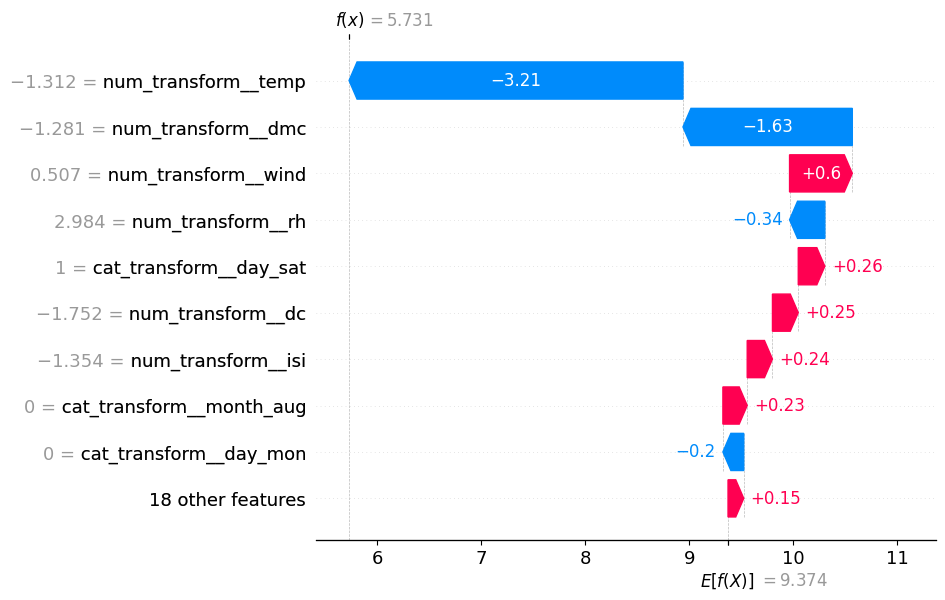

In [162]:
shap.plots.waterfall(shap_values[0])

The first plot shows 18 features contibuting +0.67, and the second plot shows all the features and gives a better idea about each feature contribution.
+ Most important features: 
    + num_transform__coord_x
    + num_transform__coord_y
    + num_transform__dmc
    + num_transform__temp
+ Least important features:
    + cat_transform__day_tue
    + num_transform__rain
    + cat_transform__month_jul
    + cat_transform__day_mon
    + cat_transform__day_wed
    + cat_transform__month_mar
    + cat_transform__day_thu

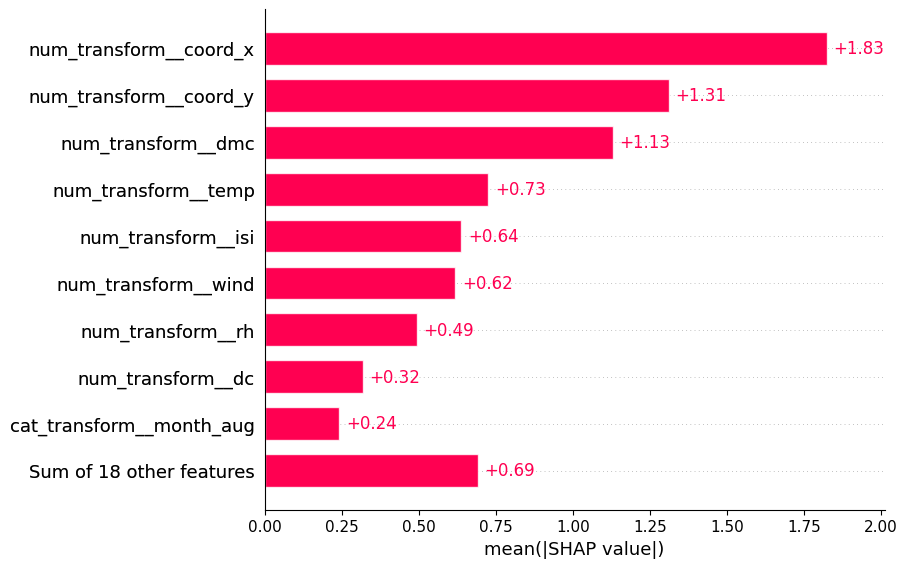

In [163]:
shap.plots.bar(shap_values)

Looking at the plot below, if I were to remove features from the model. I would remove the least contributing features since they rarely influence predictions.
+ cat_transform__day_tue
+ num_transform__rain
+ cat_transform__month_jul
+ cat_transform__day_mon
+ cat_transform__day_wed
+ cat_transform__month_mar
+ cat_transform__day_thu
<br>To test that these features actually enhance performance, I would remove them from the dataset and retrain the models to obtain the best model.

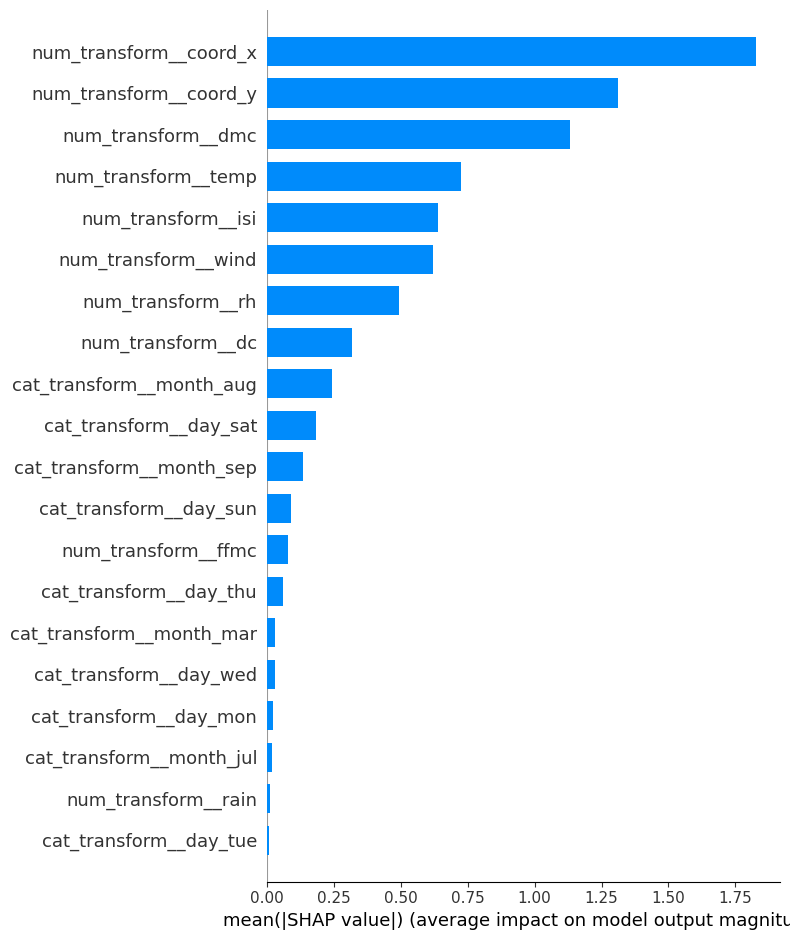

In [164]:
shap.summary_plot(shap_values, data_transform, plot_type="bar")

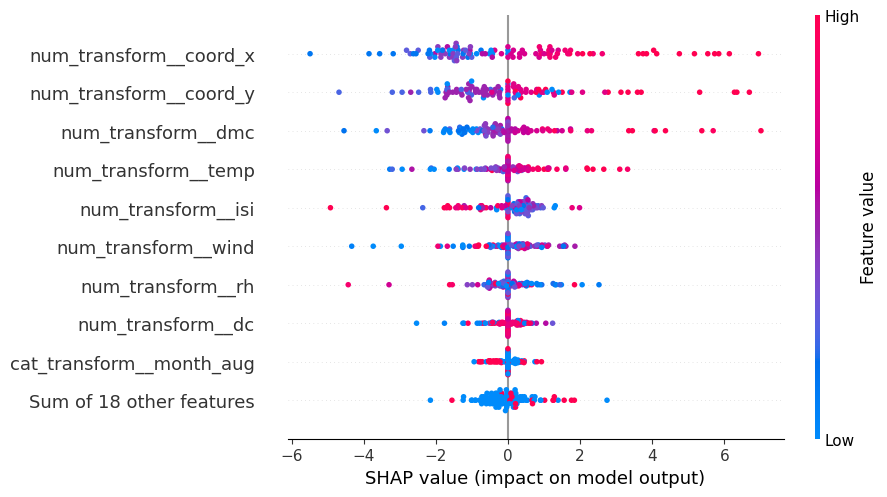

In [165]:
shap.plots.beeswarm(shap_values)

## Criteria

The [rubric](./assignment_2_rubric_clean.xlsx) contains the criteria for assessment.

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-2`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_2.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/production/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at the `help` channel. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.

# Reference

Cortez,Paulo and Morais,Anbal. (2008). Forest Fires. UCI Machine Learning Repository. https://doi.org/10.24432/C5D88D.